### Import Modules

In [ ]:
from nltk.tokenize import word_tokenize


import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import numpy as array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPool1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


### Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/4-1_Semester/practice code/Sentiment Analysis/IMDB Dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
dataset.sentiment = dataset.sentiment.apply(lambda x: 0 if x =='negative' else 1)
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
dataset.shape
dataset.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

### Processing Data

In [ ]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]

for i in range(0, 50000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])
  review = re.sub(r"\s+[a-zA-Z]\s", ' ', review)
  review = re. sub(r'\s+', ' ',review)
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
  print(len(corpus), end=' -- ') 
  print(len(corpus[i]))

Streaming output truncated to the last 5000 lines.
45001 -- 431
45002 -- 732
45003 -- 202
45004 -- 466
45005 -- 481
45006 -- 966
45007 -- 533
45008 -- 1523
45009 -- 328
45010 -- 424
45011 -- 695
45012 -- 529
45013 -- 144
45014 -- 432
45015 -- 539
45016 -- 449
45017 -- 907
45018 -- 2221
45019 -- 223
45020 -- 1493
45021 -- 267
45022 -- 164
45023 -- 403
45024 -- 729
45025 -- 702
45026 -- 1249
45027 -- 594
45028 -- 1031
45029 -- 2455
45030 -- 370
45031 -- 107
45032 -- 3119
45033 -- 477
45034 -- 143
45035 -- 1153
45036 -- 430
45037 -- 1026
45038 -- 420
45039 -- 469
45040 -- 757
45041 -- 347
45042 -- 801
45043 -- 584
45044 -- 451
45045 -- 434
45046 -- 1169
45047 -- 2735
45048 -- 286
45049 -- 588
45050 -- 800
45051 -- 745
45052 -- 472
45053 -- 1781
45054 -- 251
45055 -- 310
45056 -- 398
45057 -- 778
45058 -- 228
45059 -- 424
45060 -- 357
45061 -- 243
45062 -- 685
45063 -- 641
45064 -- 476
45065 -- 436
45066 -- 901
45067 -- 1292
45068 -- 386
45069 -- 204
45070 -- 518
45071 -- 350
45072 -- 210


In [ ]:
corpus[0]

'one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust not show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci not high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc not violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that 

### GLOVE Embadding

In [ ]:
!python -m pip install -U gensim
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.1 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
--2022-09-28 08:30:47--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-09-28 08:30:48--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-09-28 08:30:49--  https://downloads.cs.stanford.edu/nlp/data/glove

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

#glove_input_file = glove_filename
glove_path = '/content/glove.6B.100d.txt'
word2vec_output_file = '/content/glove.6B.100d.txt'+'.word2vec'
glove2word2vec(glove_path, word2vec_output_file)

(400000, 100)

In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [ ]:
class Word2VecVectorizer:
  def __init__(self, model):
    print("Loading in word vectors...")
    self.word_vectors = model
    print("Finished loading in word vectors")

  def fit(self, data):
    pass

  def transform(self, data):
    # determine the dimensionality of vectors
    v = self.word_vectors.get_vector('king')
    self.D = v.shape[0]

    X = np.zeros((len(data), self.D))
    n = 0
    emptycount = 0
    for sentence in data:
      tokens = sentence.split()
      vecs = []
      m = 0
      for word in tokens:
        try:
          # throws KeyError if word not found
          vec = self.word_vectors.get_vector(word)
          vecs.append(vec)
          m += 1
        except KeyError:
          pass
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    print("Numer of samples with no words found: %s / %s" % (emptycount, len(data)))
    return X


  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)

In [ ]:
X = corpus
y = dataset.iloc[:, -1].values

### Train - Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)

In [ ]:
vectorizer = Word2VecVectorizer(model)
# Get the sentence embeddings for the train dataset
X_train = vectorizer.fit_transform(X_train)
y_train = y_train
y_train = y_train.astype('int')
# Get the sentence embeddings for the test dataset
X_test = vectorizer.transform(X_test)
y_test = y_test
y_test = y_test.astype('int')

Loading in word vectors...
Finished loading in word vectors
Numer of samples with no words found: 0 / 40000
Numer of samples with no words found: 0 / 10000


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 100) (40000,)
(10000, 100) (10000,)


In [ ]:
X_train.shape

(40000, 100)

### Model Fit - CNN

In [ ]:
from keras.layers import Input
model_CNN = Sequential()
model_CNN. add (Embedding(input_dim = len(corpus)+1, output_dim = 50, input_length = 100, trainable=False))

model_CNN. add (Conv1D(filters=128, kernel_size= 5,padding ='same', activation= 'relu'))
model_CNN. add (Dense(24, activation= 'relu'))
model_CNN. add (GlobalMaxPool1D())
model_CNN. add (Dropout(0.3))
model_CNN. add (Dense(1, activation= 'sigmoid'))


# model_CNN. add (Conv1D(filters=64, kernel_size= 5,padding ='same', activation= 'relu'))
# model_CNN. add (MaxPooling1D(2))
# model_CNN. add(Dropout(0.5))

# model_CNN. add (Dense(32, activation= 'relu'))
# model_CNN. add(Dropout(0.5))
# model_CNN. add (Dense(16, activation= 'relu'))
# model_CNN. add (GlobalMaxPool1D())
# model_CNN. add (Dense(4, activation= 'softmax'))

# model_CNN. add (Conv1D(filters=32, kernel_size=3, padding = 'same',activation = 'relu'))
# model_CNN. add (MaxPooling1D(pool_size = 2))
# model_CNN. add (Conv1D(filters=32, kernel_size=3, padding = 'same',activation = 'relu'))
# model_CNN. add (Dense(1, activation= 'sigmoid'))

model_CNN.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
model_CNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           2500050   
                                                                 
 conv1d_3 (Conv1D)           (None, 100, 128)          32128     
                                                                 
 dense_6 (Dense)             (None, 100, 24)           3096      
                                                                 
 global_max_pooling1d_3 (Glo  (None, 24)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                      

In [ ]:
history = model_CNN.fit(X_train, y_train, epochs=10, batch_size=4, verbose=1, validation_split= 0.2)
score =model_CNN.evaluate(X_test, y_test, verbose=1)

Epoch 1/10
8000/8000 [==============================] - 27s 3ms/step - loss: 0.6927 - accuracy: 0.5131 - val_loss: 0.6912 - val_accuracy: 0.5320
Epoch 2/10
8000/8000 [==============================] - 25s 3ms/step - loss: 0.6923 - accuracy: 0.5205 - val_loss: 0.6916 - val_accuracy: 0.5320
Epoch 3/10
8000/8000 [==============================] - 27s 3ms/step - loss: 0.6924 - accuracy: 0.5197 - val_loss: 0.6915 - val_accuracy: 0.5321
Epoch 4/10
8000/8000 [==============================] - 26s 3ms/step - loss: 0.6924 - accuracy: 0.5214 - val_loss: 0.6916 - val_accuracy: 0.5320
Epoch 5/10
8000/8000 [==============================] - 23s 3ms/step - loss: 0.6926 - accuracy: 0.5205 - val_loss: 0.6920 - val_accuracy: 0.5321
Epoch 6/10
8000/8000 [==============================] - 25s 3ms/step - loss: 0.6924 - accuracy: 0.5207 - val_loss: 0.6913 - val_accuracy: 0.5320
Epoch 7/10
8000/8000 [==============================] - 26s 3ms/step - loss: 0.6922 - accuracy: 0.5222 - val_loss: 0.6912 - val_ac

### Data Validation

In [ ]:
print("Test Score: ",score[0])
print("Test Accuracy: ", score[1])

Test Score:  0.6925195455551147
Test Accuracy:  0.5253000259399414


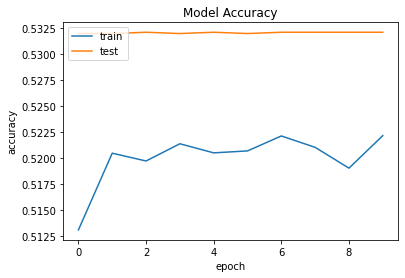

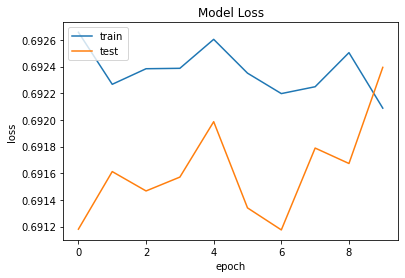

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc = 'upper left')

plt.show()

### Other Scores

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[3660 1301]
 [1767 3272]]


0.6932

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_fscore_support

def evaluate(y_test, y_pred):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """

    print(cm)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average = 'binary')
    print(f"precision:{precision:.3f} \nrecall:{recall:.3f}\nF1 score: {f1:.3f}")

    # preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')

    
    # Get accuracy over the test set
    # y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('CNN')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[[3660 1301]
 [1767 3272]]
precision:0.716 
recall:0.649
F1 score: 0.681
AUC: 0.6935
Accuracy: 69.32%


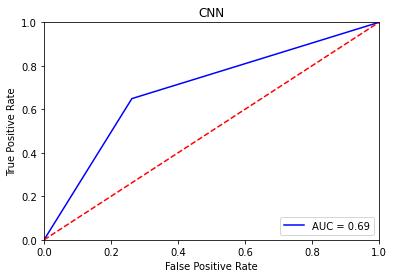

In [ ]:
evaluate(y_test, y_pred)